# MAAI Bootcamp :: End-to-End Machine Learning

## Introduction

This section is based on chapter 3 of the book *Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow, 3rd Edition 2022* by Aurélien Géron, and many code snippets, explanations and illustrations were used. Some changes were made to accommodate the subject within the MAAI bootcamp's timeframe. The book is a relevant source for a recap, and it is available in the [HvA Library](https://bib.hva.nl). 

It is expected that you know the basics of ML/DL, and the intention of the bootcamp is to recapitulate important concepts. For this session, we are covering the following:
- how to *explore and visualise data*
- how to *preprocess data* for ML
- how to *split data* into training, validation and test
- how to *train and test* a ML model

Here, we are covering the steps in a typical machine learning project:

1. Look at the big picture
2. Get the data
3. Explore and visualize the data to gain insights
4. Prepare the data for machine learning algorithms
5. Select a model and train it
6. Fine-tune your model
7. Present your solution
8. Launch, monitor, and maintain your system

## Use Case

We are using the *California Housing Prices* dataset from the StatLib repository⁠. It is based on data from the 1990 California census. The goal of this use case is to predict the median housing price from other metrics present in this dataset, such as the location, owner income, and the number of bedrooms.

![California Housing Prices Map]( support/images/mls3_0201.png)


## 1. Look at the big picture

The task is to use the California census data to build a model of housing prices in the state. This data includes metrics such as the population, median income, and median housing price for each block group in California. Block groups are the smallest geographical unit for which the US Census Bureau publishes sample data (a block group typically has a population of 600 to 3,000 people). For the sake of simplicity, we are calling them "districts".

The model should learn from this data and be able to predict the median housing price in any district.

### Framing the problem

- This is a typical **supervised learning** task, since the model can be trained with labeled examples (each instance comes with the expected output, i.e., the district’s median housing price). 
- It is a typical **regression task**, since the model will be asked to predict a value. More specifically, this is a **multiple regression problem**, since the system will use multiple features to make a prediction (the district’s population, the median income, etc.). 
- It is also a **univariate regression** problem, since we are only trying to predict a single value for each district. If we were trying to predict multiple values per district, it would be a *multivariate regression* problem. 


### Selecting a performance measure

We should find a way to quantify the developed model's performance. A typical performance measure for regression problems is the root mean square error (RMSE). It gives an idea of the system's typical error in its predictions, with a higher weight given to large errors. 

$$
\text{RMSE} = \sqrt{\frac{1}{n} \sum_{i=1}^{n} \left( y_i - \hat{y}_i \right)^2}
$$

where 
* $n$ is the number of observations, 
* $y_i$ is the actual value of the *i-th* observation,
* $\hat{y}_i$ is the predicted value for the *i-th* observation,

The formula calculates the square root of the average of the squared differences between actual and predicted values.

> There is a variety of metrics available for performance evaluation, each with its unique advantages. For instance, you can use MAE (Mean Absolute Error) when dealing with data that has many outliers, or MSE (Mean Squared Error) and R-squared error for other scenarios.

## 2. Get the data

### Download the data

The following code snippet downloads a compressed file with housing data and extract it into your local folder. For convenience, we are using the preprocessed version from the book.

In [2]:
from pathlib import Path
import pandas as pd
import tarfile
import urllib.request

def load_housing_data():
    tarball_path = Path("datasets/housing.tgz")
    if not tarball_path.is_file():
        Path("datasets").mkdir(parents=True, exist_ok=True)
        url = "https://github.com/ageron/data/raw/main/housing.tgz"
        urllib.request.urlretrieve(url, tarball_path)
        with tarfile.open(tarball_path) as housing_tarball:
            housing_tarball.extractall(path="datasets")
    return pd.read_csv(Path("datasets/housing/housing.csv"))

housing = load_housing_data()

### Take a Quick Look at the Data Structure

We start by looking at the top 10 rows of data using the DataFrame’s head() function.

In [3]:
housing.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


The info() method is useful to get a quick description of the data, in particular the total number of rows, each attribute’s type, and the number of non-null values

In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


The total_bedrooms attribute has only 20,433 non-null values, meaning that 207 districts are missing this feature. You will need to take care of this later.

All attributes are numerical, except for ocean_proximity. By looking at the top five rows, we noticed that the values in the ocean_proximity column were repetitive, which means that it is probably a categorical attribute. You can find out what categories exist and how many districts belong to each category by using the value_counts() function:

In [32]:
housing["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

The describe() function gives a summary of statistical measures for each numerical column in a DataFrame. It's a quick way to get an overview of the data's distribution and central tendencies.

In [33]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


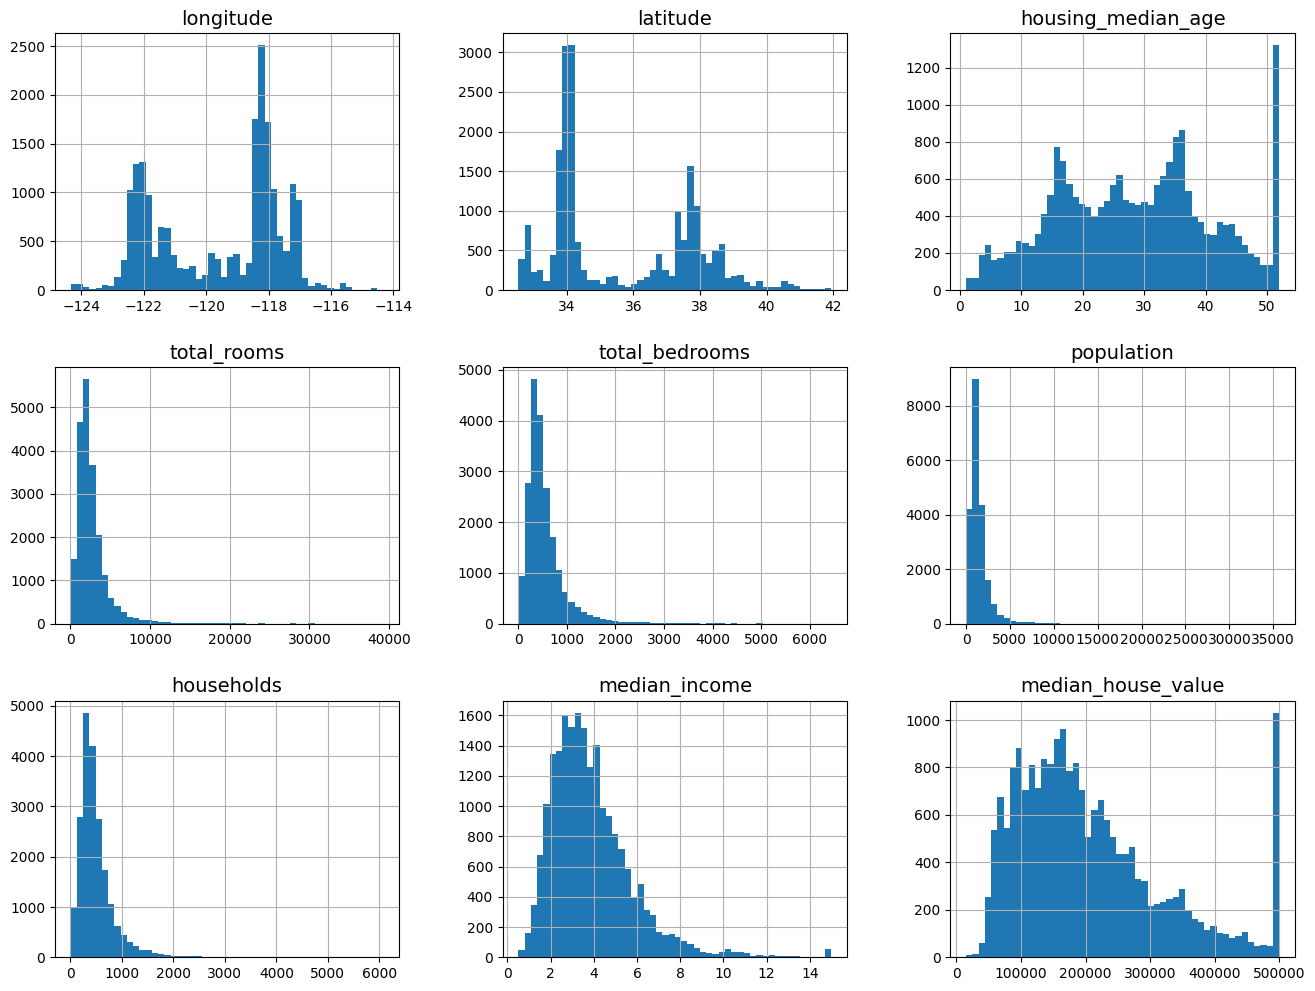

In [34]:
import matplotlib.pyplot as plt

# extra code – the next 5 lines define the default font sizes
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

housing.hist(bins=50, figsize=(16,12))
plt.show()

You will see that the unit of measure in the *median income* column is not easily interpretable. This value has been capped at 15 max and 0.5 min. These numbers represent roughly tens of thousands of dollars. For example, 4 means around 40,000 USD of year income. 

Other facts:
- *Housing median age* and *median house* value were capped as well
- The *median house value* is our target, which we want to predict 
- It was capped to 500K USD 
- If we want to predict values beyond 500K USD, there are two options: 
    - Collect proper labels for the capped districts 
    - Remove those districts from the training and test sets

### Scale and Skewing

* These attributes have very different scales 
    * We'll fix them with feature scaling 
* Many histograms are skewed right, they extend more to the right than the left 
    * For the sake of time, we are keeping it as is 

### Create a Test Set

Wait! Before you look at the data any further, you need to create a test set, put it aside, and never look at it.

Creating a test set is theoretically simple; pick some instances randomly, typically 20% of the dataset (or less if your dataset is very large), and set them aside.

In [35]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

#### To stratify or to not stratify

* Random sampling could be fine for large data sets 
* But may introduce sampling bias 
* Consider a sample from a population that is 51% female 
    * A random sample might contain only 48% or 54% females 

Stratified sampling can address these issues by:
* Take the important feature or a combination of important features and gather it into categories 
* Then sample the correct number from each category

Here we are creating five categories of income (in bins) and use them as a basis for stratification.

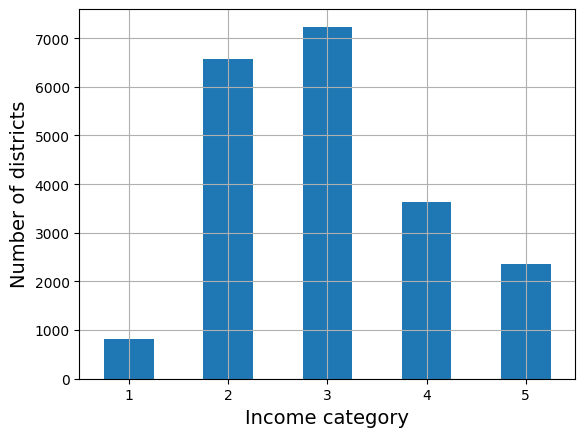

In [36]:
import numpy as np

housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

housing["income_cat"].value_counts().sort_index().plot.bar(rot=0, grid=True)
plt.xlabel("Income category")
plt.ylabel("Number of districts")
plt.show()

In [37]:
strat_train_set, strat_test_set = train_test_split(
    housing, test_size=0.2, stratify=housing["income_cat"], random_state=42)

In [38]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

income_cat
3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: count, dtype: float64

In [39]:
def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall %": income_cat_proportions(housing),
    "Stratified %": income_cat_proportions(strat_test_set),
    "Random %": income_cat_proportions(test_set),
}).sort_index()
compare_props.index.name = "Income Category"
compare_props["Strat. Error %"] = (compare_props["Stratified %"] /
                                   compare_props["Overall %"] - 1)
compare_props["Rand. Error %"] = (compare_props["Random %"] /
                                  compare_props["Overall %"] - 1)
(compare_props * 100).round(2)

,Overall %,Stratified %,Random %,Strat. Error %,Rand. Error %
Income Category,,,,,
1,3.98,4.00,4.24,0.36,6.45
2,31.88,31.88,30.74,-0.02,-3.59
3,35.06,35.05,34.52,-0.01,-1.53
4,17.63,17.64,18.41,0.03,4.42
5,11.44,11.43,12.09,-0.08,5.63


In [40]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

## 3. Explore and Visualize the Data to Gain Insights


### Visualising geographical data


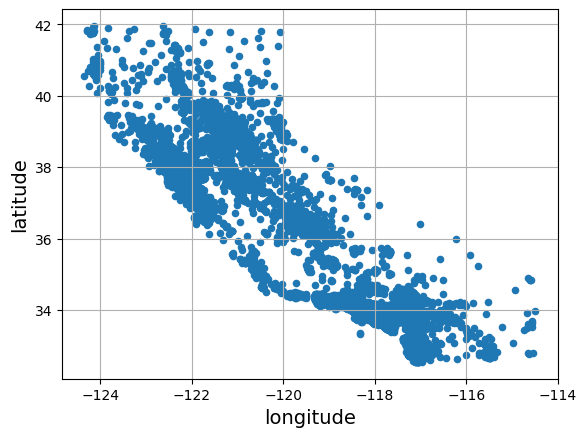

In [41]:
strat_train_set.plot(kind="scatter", x="longitude", y="latitude", grid=True)
plt.show()

Points with high density

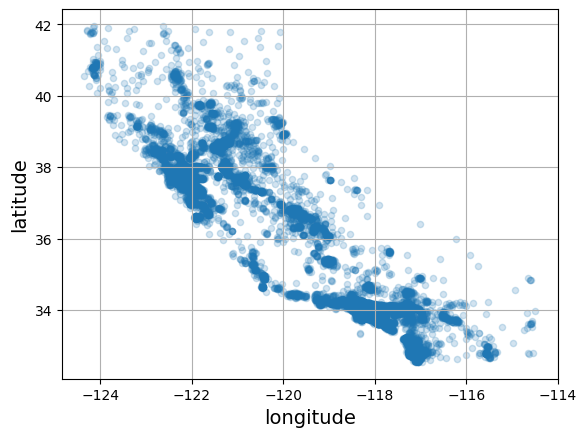

In [42]:
strat_train_set.plot(kind="scatter", x="longitude", y="latitude", grid=True, alpha=0.2)
plt.show()

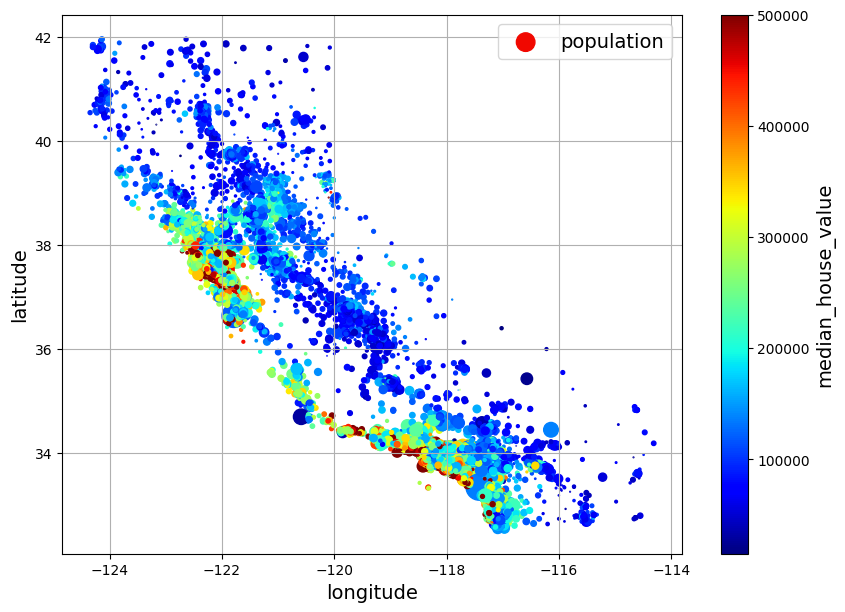

In [43]:
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True,
             s=housing["population"] / 100, label="population",
             c="median_house_value", cmap="jet", colorbar=True,
             legend=True, sharex=False, figsize=(10, 7))
plt.show()

In [44]:
corr_matrix = strat_train_set.corr(numeric_only=True)
corr_matrix["median_house_value"].sort_values(ascending=False)



median_house_value    1.000000
median_income         0.688380
total_rooms           0.137455
housing_median_age    0.102175
households            0.071426
total_bedrooms        0.054635
population           -0.020153
longitude            -0.050859
latitude             -0.139584
Name: median_house_value, dtype: float64

## 4. Prepare the data for machine learning algorithms.

In [45]:
strat_train_set_labels = strat_train_set["median_house_value"].copy()
strat_train_set = strat_train_set.drop("median_house_value", axis=1)

numeric_columns = strat_train_set.select_dtypes(include=['float64', 'int64']).columns
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   longitude           20640 non-null  float64 
 1   latitude            20640 non-null  float64 
 2   housing_median_age  20640 non-null  float64 
 3   total_rooms         20640 non-null  float64 
 4   total_bedrooms      20433 non-null  float64 
 5   population          20640 non-null  float64 
 6   households          20640 non-null  float64 
 7   median_income       20640 non-null  float64 
 8   median_house_value  20640 non-null  float64 
 9   ocean_proximity     20640 non-null  object  
 10  income_cat          20640 non-null  category
dtypes: category(1), float64(9), object(1)
memory usage: 1.6+ MB


### Data Cleaning

Most machine learning algorithms cannot work with missing features, so you’ll need to take care of these. For example, you noticed earlier that the total_bedrooms attribute has some missing values. You have three options to fix this:

1. Get rid of the corresponding districts.

2. Get rid of the whole attribute.

3. Set the missing values to some value (zero, the mean, the median, etc.). This is called imputation.

You can accomplish these easily using the Pandas DataFrame’s dropna(), drop(), and fillna() methods:

We decided to go for option 3

In [46]:
def clean_data(df):
    median = df["total_bedrooms"].median()  # option 3
    df["total_bedrooms"] = df["total_bedrooms"].fillna(median)
    return df

In [47]:
strat_train_set = clean_data(strat_train_set)

### Experimenting with attribute combinations

In [48]:
def create_ratios(df):
    df["rooms_per_house"] = df["total_rooms"] / df["households"]
    df["bedrooms_ratio"] = df["total_bedrooms"] / df["total_rooms"]
    df["people_per_house"] = df["population"] / df["households"]
    return df

df = create_ratios(strat_train_set)

In [49]:
all_df = pd.concat([strat_train_set, strat_train_set_labels], axis=1)

corr_matrix = all_df.corr(numeric_only=True)

corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688380
rooms_per_house       0.143663
total_rooms           0.137455
housing_median_age    0.102175
households            0.071426
total_bedrooms        0.054530
population           -0.020153
people_per_house     -0.038224
longitude            -0.050859
latitude             -0.139584
bedrooms_ratio       -0.229558
Name: median_house_value, dtype: float64

In [50]:
strat_train_set.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_house,bedrooms_ratio,people_per_house
count,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000
mean,-119.573125,35.637746,28.577156,2639.402798,537.881298,1425.513929,499.990189,3.870428,5.441010,0.213727,2.995974
std,2.000624,2.133294,12.585738,2185.287466,421.831667,1094.795467,382.865787,1.891936,2.574143,0.066077,4.457373
min,-124.350000,32.550000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,0.888889,0.037066,0.692308
25%,-121.800000,33.930000,18.000000,1447.000000,297.000000,787.000000,279.000000,2.562500,4.443636,0.175058,2.433426
50%,-118.510000,34.260000,29.000000,2125.000000,434.000000,1167.000000,408.000000,3.538500,5.235573,0.203120,2.822316
75%,-118.010000,37.720000,37.000000,3154.000000,642.000000,1726.000000,603.000000,4.750000,6.053843,0.239844,3.286385
max,-114.490000,41.950000,52.000000,39320.000000,6210.000000,16305.000000,5358.000000,15.000100,141.909091,2.818182,502.461538


### Dropping outliers

This is a typical step performed in this phase. For the sake of time we are skipping that. Note that the use of boxplots can be very useful to visualise outliers.

### Handling text and categorical attributes

In [51]:
strat_train_set["ocean_proximity"].head(10)

13096      NEAR BAY
14973     <1H OCEAN
3785         INLAND
14689        INLAND
20507    NEAR OCEAN
1286         INLAND
18078     <1H OCEAN
4396       NEAR BAY
18031     <1H OCEAN
6753      <1H OCEAN
Name: ocean_proximity, dtype: object

In [52]:
from sklearn.preprocessing import OneHotEncoder

def create_onehot_ocean_proximity(df):

    cat_encoder = OneHotEncoder(sparse_output=False)
    
    housing_cat_1hot = cat_encoder.fit_transform(df[["ocean_proximity"]])
    housing_cat_1hot_columns = cat_encoder.get_feature_names_out(["ocean_proximity"])
    housing_cat_1hot_df = pd.DataFrame(housing_cat_1hot, columns=housing_cat_1hot_columns, index=df.index)

    df = pd.concat([df, housing_cat_1hot_df], axis=1)
    df = df.drop(["ocean_proximity"], axis=1)

    return df



In [53]:
strat_train_set = create_onehot_ocean_proximity(strat_train_set)


In [54]:
strat_train_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_house,bedrooms_ratio,people_per_house,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
13096,-122.42,37.80,52.0,3321.0,1115.0,1576.0,1034.0,2.0987,3.211799,0.335742,1.524178,0.0,0.0,0.0,1.0,0.0
14973,-118.38,34.14,40.0,1965.0,354.0,666.0,357.0,6.0876,5.504202,0.180153,1.865546,1.0,0.0,0.0,0.0,0.0
3785,-121.98,38.36,33.0,1083.0,217.0,562.0,203.0,2.4330,5.334975,0.200369,2.768473,0.0,1.0,0.0,0.0,0.0
14689,-117.11,33.75,17.0,4174.0,851.0,1845.0,780.0,2.2618,5.351282,0.203881,2.365385,0.0,1.0,0.0,0.0,0.0
20507,-118.15,33.77,36.0,4366.0,1211.0,1912.0,1172.0,3.5292,3.725256,0.277371,1.631399,0.0,0.0,0.0,0.0,1.0


## Feature scaling

In [55]:
numeric_columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income'],
      dtype='object')

In [56]:
from sklearn.preprocessing import StandardScaler

def scale_num_values(df, numeric_columns):
    scaler = StandardScaler()
    df[numeric_columns] = scaler.fit_transform(df[numeric_columns])
    return df

strat_train_set = scale_num_values(strat_train_set, numeric_columns)


In [57]:
strat_train_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_house,bedrooms_ratio,people_per_house,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
13096,-1.423037,1.013606,1.861119,0.311912,1.368167,0.137460,1.394812,-0.936491,3.211799,0.335742,1.524178,0.0,0.0,0.0,1.0,0.0
14973,0.596394,-0.702103,0.907630,-0.308620,-0.435925,-0.693771,-0.373485,1.171942,5.504202,0.180153,1.865546,1.0,0.0,0.0,0.0,0.0
3785,-1.203098,1.276119,0.351428,-0.712240,-0.760709,-0.788768,-0.775727,-0.759789,5.334975,0.200369,2.768473,0.0,1.0,0.0,0.0,0.0
14689,1.231216,-0.884924,-0.919891,0.702262,0.742306,0.383175,0.731375,-0.850281,5.351282,0.203881,2.365385,0.0,1.0,0.0,0.0,0.0
20507,0.711362,-0.875549,0.589800,0.790125,1.595753,0.444376,1.755263,-0.180365,3.725256,0.277371,1.631399,0.0,0.0,0.0,0.0,1.0


## 5. Select A Model And Train It

### Linear regression

In [58]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(strat_train_set, strat_train_set_labels)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [59]:
housing_predictions = lin_reg.predict(strat_train_set)
print(f'Predicted values: {housing_predictions[:5].round(-2)}')
print(f'Actual values: {strat_train_set_labels.iloc[:5].values}')


Predicted values: [276600. 333600. 118200. 108300. 308900.]
Actual values: [458300. 483800. 101700.  96100. 361800.]


The first prediction is off by more than 180K USD. Let's see how the model performs overall.

In [61]:
from sklearn.metrics import root_mean_squared_error
lin_rmse = root_mean_squared_error(strat_train_set_labels, housing_predictions)
print(f'Linear Regression RMSE: {lin_rmse:.2f}')

Linear Regression RMSE: 67769.12


* The root mean squared error is almost 68K USD
* The median_housing_values range from $120,000 to $265,000
* It seems that these are pretty bad predictions

### Random Forest Regressor

In [62]:
strat_train_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_house,bedrooms_ratio,people_per_house,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
13096,-1.423037,1.013606,1.861119,0.311912,1.368167,0.137460,1.394812,-0.936491,3.211799,0.335742,1.524178,0.0,0.0,0.0,1.0,0.0
14973,0.596394,-0.702103,0.907630,-0.308620,-0.435925,-0.693771,-0.373485,1.171942,5.504202,0.180153,1.865546,1.0,0.0,0.0,0.0,0.0
3785,-1.203098,1.276119,0.351428,-0.712240,-0.760709,-0.788768,-0.775727,-0.759789,5.334975,0.200369,2.768473,0.0,1.0,0.0,0.0,0.0
14689,1.231216,-0.884924,-0.919891,0.702262,0.742306,0.383175,0.731375,-0.850281,5.351282,0.203881,2.365385,0.0,1.0,0.0,0.0,0.0
20507,0.711362,-0.875549,0.589800,0.790125,1.595753,0.444376,1.755263,-0.180365,3.725256,0.277371,1.631399,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14207,0.586397,-0.833359,0.987087,-0.184147,0.140152,-0.445315,0.060101,0.444041,4.277247,0.266875,1.793499,1.0,0.0,0.0,0.0,0.0
13105,0.131525,0.319822,-0.443146,0.139847,0.128298,-0.005950,0.083608,-0.685630,5.535714,0.201019,2.667293,0.0,1.0,0.0,0.0,0.0
19301,1.256209,-1.428701,-1.237721,0.586026,0.562134,1.268299,0.679135,0.101049,5.157895,0.197704,3.702632,0.0,0.0,0.0,0.0,1.0
19121,0.586397,-0.739605,0.669257,0.522417,0.794461,0.273563,0.882868,0.145396,4.511933,0.230891,2.058473,1.0,0.0,0.0,0.0,0.0


In [63]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(random_state=42)

rf_reg.fit(strat_train_set, strat_train_set_labels)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [64]:
housing_predictions = rf_reg.predict(strat_train_set)
rf_rmse = root_mean_squared_error(strat_train_set_labels, housing_predictions)
print(f'Random Forest RMSE: {rf_rmse:.2f}')

Random Forest RMSE: 18487.93


Results are somewhat better, but still on the training set

### Better evaluations using Cross-Validation

* Splits the training set into 10 subsets called folds
* Trains the model 10 times on 9 folds
* Evaluating each one on the remaining fold

In [65]:
from sklearn.model_selection import cross_val_score

rf_rmses = -cross_val_score(rf_reg, strat_train_set, strat_train_set_labels,
                              scoring="neg_root_mean_squared_error", cv=10)

In [66]:
pd.Series(rf_rmses).describe()

count       10.000000
mean     49611.297917
std       1009.419441
min      47623.103039
25%      49028.862918
50%      49782.041140
75%      50234.339178
max      51235.835631
dtype: float64

* Results are somewhat better,
* Error is more than 49K USD on average
* But on the training set, the error is $17,000
    * Still a lot of overfitting

## 6. Fine-tune your model

Fine-tuning is an important step in the ML pipeline. We are covering this topic in another section. From now on let's skip it.

For this example, we assume that the model was already fine-tuned. Thus, it is time to evaluate the model performance on the test set.

In [67]:
X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

# Performing transformations on the test set (this process can be optimised, for now we are keeping it manual and explicit)
X_test = clean_data(X_test)
X_test = create_ratios(X_test)
X_test = scale_num_values(X_test, numeric_columns)
X_test = create_onehot_ocean_proximity(X_test)


final_predictions = rf_reg.predict(X_test)

final_rmse = root_mean_squared_error(y_test, final_predictions)
print(f'RMSE on the test set: {final_rmse:.2f}')  

RMSE on the test set: 51372.92


## 7. Present your solution

Here, results are shared with key stakeholders

## 8. Launch, monitor, and maintain your system

Here, your model is embedded into an application, which is used by end-users and constantly monitored. 

# Summary

In these session we covered the basic ML steps. From now on, you should work on the activity available in the jupyter notebook called *day1-p4.ipynb*. You can keep working as a team to share ideas and help each other, but the exercise is individual.